In [1]:
from vedo import dataurl, Mesh, Arrows, show, settings

settings.default_backend = "vtk"


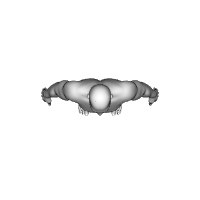

In [2]:
# Load a mesh
mesh = Mesh(dataurl+"man.vtk").color("white")
mesh


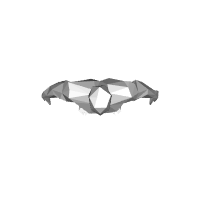

In [3]:
# Create a heavily decimated copy with about 200 points
# (to speed up the computation)
mesh_dec = mesh.clone().triangulate().decimate(n=200)
mesh_dec

In [5]:
sources = [[0.9, 0.0, 0.2]]  # this point moves
targets = [[1.2, 0.0, 0.4]]  # ...to this.
for pt in mesh_dec.vertices:
    if pt[0] < 0.3:          # while these pts don't move
        sources.append(pt)   # (e.i. source = target)
        targets.append(pt)


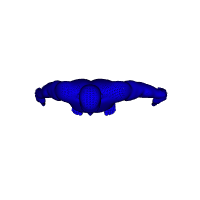

In [6]:
# Warp the mesh
mesh_warped = mesh.clone().warp(sources, targets)
mesh_warped.c("blue").wireframe()

In [7]:
# Create the arrows representing the displacement
arrow = Arrows(sources, targets)

# Show the meshes and the arrow
show(mesh, mesh_warped, arrow, axes=1).close()